# Import Packages

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import networkx as nx
from small_world_functions import sub_df, df_to_adjacency_array, monster_names_to_df

# Create Adjacency Matrix of Monsters

In [3]:
deck_names = ['Ash Blossom & Joyous Spring',
                        'D.D. Crow',
                        'Effect Veiler',
                        'Ghost Belle & Haunted Mansion',
                        'Mathmech Addition',
                        'Mathmech Circular',
                        'Mathmech Diameter',
                        'Mathmech Multiplication',
                        'Mathmech Nabla',
                        'Mathmech Sigma',
                        'Mathmech Subtraction',
                        'Nibiru, the Primal Being',
                        'PSY-Frame Driver',
                        'PSY-Framegear Gamma']

df_deck = monster_names_to_df(deck_names)

mathmech_matrix = df_to_adjacency_array(df_deck)
mathmech_matrix_squared = np.linalg.matrix_power(mathmech_matrix, 2)

# Cropped Images of Main Deck Monsters

In [4]:
#generate dataframe of all cards to get image links
with open('cardinfo.json') as file_path:
    json_all_cards = json.load(file_path)
df_all_cards = pd.DataFrame(json_all_cards['data'])

df_deck_images = sub_df(df_all_cards,deck_names,'name')
df_deck_images['card_images'] = df_deck_images['card_images'].apply(lambda x: x[0]['image_url_cropped'])
df_deck_images['card_images'].tolist()

['https://images.ygoprodeck.com/images/cards_cropped/14558127.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/24508238.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/97268402.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/73642296.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/80965043.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/36521307.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/17946349.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/52354896.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/53577438.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/27182739.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/16360142.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/27204311.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/49036338.jpg',
 'https://images.ygoprodeck.com/images/cards_cropped/38814750.jpg']

# Generate Graph

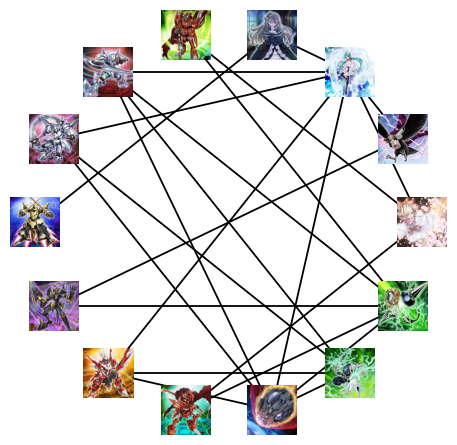

In [5]:
#images must be in alphabetical order by name
img00 = mpimg.imread('images/card_images/00_Ash_Blossom.jpg')
img01 = mpimg.imread('images/card_images/01_DD_Crow.jpg')
img02 = mpimg.imread('images/card_images/02_Effect_Veiler.jpg')
img03 = mpimg.imread('images/card_images/03_Ghost_Belle.jpg')
img04 = mpimg.imread('images/card_images/04_Mathmech_Addition.jpg')
img05 = mpimg.imread('images/card_images/05_Mathmech_Circular.jpg')
img06 = mpimg.imread('images/card_images/06_Mathmech_Diameter.jpg')
img07 = mpimg.imread('images/card_images/07_Mathmech_Multiplication.jpg')
img08 = mpimg.imread('images/card_images/08_Mathmech_Nabla.jpg')
img09 = mpimg.imread('images/card_images/09_Mathmech_Sigma.jpg')
img10 = mpimg.imread('images/card_images/10_Mathmech_Subtraction.jpg')
img11 = mpimg.imread('images/card_images/11_Nibiru.jpg')
img12 = mpimg.imread('images/card_images/12_PSY_Frame_Driver.jpg')
img13 = mpimg.imread('images/card_images/13_PSY_Framegear_Gamma.jpg')
imgs = [img00,img01,img02,img03,img04,img05,img06,img07,img08,img09,img10,img11,img12,img13]


G = nx.from_numpy_array(mathmech_matrix)
for i in range(len(imgs)):
    G.nodes[i]["image"] = imgs[i] #asigns image to each node

pos=nx.circular_layout(G)

fig=plt.figure(figsize=(5,5))
ax=plt.subplot(111)
ax.set_aspect('equal')
nx.draw_networkx_edges(G,pos,ax=ax, width=1.3), 

plt.xlim(-1,1)
plt.ylim(-1,1)

trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.1 # this is the image size
p2=piesize/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])
    a.set_aspect('equal')
    a.imshow(G.nodes[n]['image'])
    a.axis('off')
ax.axis('off')
plt.savefig('images\mathmech-graph.png')
plt.show()

# Generate Matrix Images

In [6]:
CARD_SIZE = img00.shape[0] #assumes all images are the same size and square
NUM_CARDS = len(deck_names)
IMAGE_SIZE = CARD_SIZE*(NUM_CARDS+1)
MATRIX_IMAGE_SIZE = CARD_SIZE*NUM_CARDS
VERTICAL_CARDS = np.concatenate(imgs, axis=1) #concatenated images horizontally
HORIZONTAL_CARDS = np.concatenate(imgs, axis=0) #concatenated images vertically

circ_index = 5
HIGHLIGHT_COLUMN_INDEX = circ_index

def generate_matrix_image(matrix, highlight_column=False):
    image = np.ones((IMAGE_SIZE,IMAGE_SIZE,3))*255

    #card images
    image[CARD_SIZE:,0:CARD_SIZE,:] = HORIZONTAL_CARDS
    image[0:CARD_SIZE,CARD_SIZE:,:] = VERTICAL_CARDS

    matrix_image = (np.ones((MATRIX_IMAGE_SIZE,MATRIX_IMAGE_SIZE,3))*255)

    maximum = np.max(matrix)
    maximum_highlighted = np.max(matrix[HIGHLIGHT_COLUMN_INDEX,:])

    #color in cells
    for i in range(NUM_CARDS):
        for j in range(NUM_CARDS):
            matrix_entry = matrix[i,j]
            if matrix_entry>0:
                if j==HIGHLIGHT_COLUMN_INDEX and highlight_column==True:
                    #highlighted cell color
                    matrix_image[i*CARD_SIZE:(i+1)*CARD_SIZE,j*CARD_SIZE:(j+1)*CARD_SIZE,0]=255
                    matrix_image[i*CARD_SIZE:(i+1)*CARD_SIZE,j*CARD_SIZE:(j+1)*CARD_SIZE,1]=220*(1-matrix_entry/maximum_highlighted)
                    matrix_image[i*CARD_SIZE:(i+1)*CARD_SIZE,j*CARD_SIZE:(j+1)*CARD_SIZE,2]=220*(1-matrix_entry/maximum_highlighted)
                else:
                    #cell color
                    matrix_image[i*CARD_SIZE:(i+1)*CARD_SIZE,j*CARD_SIZE:(j+1)*CARD_SIZE,:]=220*(1-matrix_entry/maximum)
    image[CARD_SIZE:,CARD_SIZE:,:] = matrix_image

    image = image.astype(np.uint8)
    return image

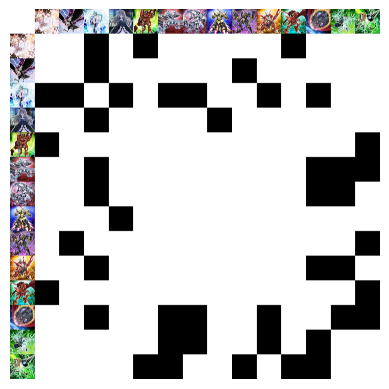

In [7]:
mathmech_matrix_image = generate_matrix_image(mathmech_matrix)

fig = plt.imshow(mathmech_matrix_image)
ax = plt.subplot(111)
ax.axis('off')
plt.savefig('images\mathmech-adjacency-matrix.png', dpi=128.5, bbox_inches='tight')
plt.show()

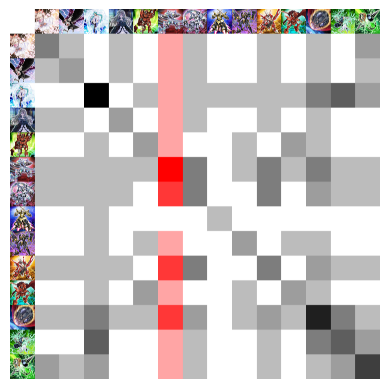

In [8]:
mathmech_matrix_squared_image = generate_matrix_image(mathmech_matrix_squared, highlight_column=True)

fig = plt.imshow(mathmech_matrix_squared_image)
ax = plt.subplot(111)
ax.axis('off')
plt.savefig('images\mathmech-adjacency-matrix-squared.png', dpi=128.5, bbox_inches='tight')
plt.show()